## Fit three experiments in different buffers (with paired blanks) to determine buffer-independent enthalpy and number of protons exchanged on binding
Fits binding of calcium onto EDTA in HEPES, Tris, and Imidazole.

In [1]:
%matplotlib inline
import pytc

# Fit successful? True
# AIC: 105.86078914038897
# AICc: 107.22001244135984
# BIC: 155.01045484568925
# F: 121809.06643795907
# Rsq: 0.9997872805822757
# Rsq_adjusted: 0.9997790727590838
# ln(L): -39.93039457019449
# num_obs: 324
# num_param: 12
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,np_dH_intrinsic,NA,7.70482e+02,1.97190e-02,float,0.00000e+00,-inf,inf
global,hepes_heat,NA,-4.04133e+02,1.40148e-03,float,0.00000e+00,-inf,inf
global,global_K,NA,4.33275e+07,3.07293e-06,float,1.00000e+06,-inf,inf
global,hepes_intercept,NA,-2.01588e-01,2.78921e-01,float,0.00000e+00,-inf,inf
global,imid_intercept,NA,-8.19165e-01,0.00000e+00,float,0.00000e+00,-inf,inf
global,tris_heat,NA,-2.37406e+03,0.00000e+00,float,0.00000e+00,-inf,inf
global,imid_heat,NA,3.48388e+03,0.00000e+00,float,0.00000e+00,-inf,inf
global,np_num_H,NA,-1.10023e+00,1.37688e+00,float,0.00000e+00,-inf,inf
global,tris_intercept,NA,-2.30816e-02,0.00000e+00,float,0.00000e+

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


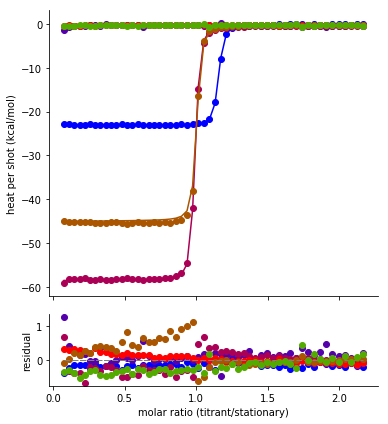

In [2]:
# --------------------------------------------------------------------
# define buffer ionization enthalpies.
# goldberg et al (2002) Journal of Physical and Chemical Reference Data 31 231,  doi: 10.1063/1.1416902
HEPES_IONIZATION_DH = 20.4/4.184*1000
TRIS_IONIZATION_DH = 47.45/4.184*1000
IMID_IONIZATION_DH = 36.64/4.184*1000 

import pytc
from pytc import global_connectors

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()
num_protons = global_connectors.NumProtons("np")

# ------------------------------------------------------------------------------------
# HEPES buffer experiment

hepes = pytc.ITCExperiment("ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)
hepes.ionization_enthalpy = HEPES_IONIZATION_DH

g.add_experiment(hepes)
g.link_to_global(hepes,"K","global_K")
g.link_to_global(hepes,"dH",num_protons.dH)
g.link_to_global(hepes,"dilution_heat","hepes_heat")
g.link_to_global(hepes,"dilution_intercept","hepes_intercept")

# ------------------------------------------------------------------------------------
# HEPES buffer blank

hepes_blank = pytc.ITCExperiment("ca-edta/hepes-blank.DH",pytc.indiv_models.Blank,shot_start=2)
hepes.ionization_enthalpy = HEPES_IONIZATION_DH

g.add_experiment(hepes_blank)
g.link_to_global(hepes_blank,"dilution_heat","hepes_heat")
g.link_to_global(hepes_blank,"dilution_intercept","hepes_intercept")

# ------------------------------------------------------------------------------------
# Tris buffer experiment

tris = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)
tris.ionization_enthalpy = TRIS_IONIZATION_DH

g.add_experiment(tris)
g.link_to_global(tris,"K","global_K")
g.link_to_global(tris,"dH",num_protons.dH)
g.link_to_global(tris,"dilution_heat","tris_heat")
g.link_to_global(tris,"dilution_intercept","tris_intercept")

# ------------------------------------------------------------------------------------
# Tris buffer blank

tris_blank = pytc.ITCExperiment("ca-edta/tris-blank.DH",pytc.indiv_models.Blank,shot_start=2)
tris.ionization_enthalpy = TRIS_IONIZATION_DH

g.add_experiment(tris_blank)
g.link_to_global(tris_blank,"dilution_heat","tris_heat")
g.link_to_global(tris_blank,"dilution_intercept","tris_intercept")

# ------------------------------------------------------------------------------------
# Imidazole buffer experiment

imid = pytc.ITCExperiment("ca-edta/imid-01.DH",pytc.indiv_models.SingleSite,shot_start=2)
imid.ionization_enthalpy = IMID_IONIZATION_DH

g.add_experiment(imid)
g.link_to_global(imid,"K","global_K")
g.link_to_global(imid,"dH",num_protons.dH)
g.link_to_global(imid,"dilution_heat","imid_heat")
g.link_to_global(imid,"dilution_intercept","imid_intercept")

# ------------------------------------------------------------------------------------
# Imidazole buffer blank

imid_blank = pytc.ITCExperiment("ca-edta/imid-blank.DH",pytc.indiv_models.Blank,shot_start=2)
imid.ionization_enthalpy = IMID_IONIZATION_DH

g.add_experiment(imid_blank)
g.link_to_global(imid_blank,"dilution_heat","imid_heat")
g.link_to_global(imid_blank,"dilution_intercept","imid_intercept")

# --------------------------------------------------------------------
# Do a global fit
g.fit()

# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)
